In [1]:
import pandas as pd
import glob
import numpy as np
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
glob.glob("FBOT_ForFed/*/*")

['FBOT_ForFed/OtherFast/iPTF16asu.json',
 'FBOT_ForFed/OtherFast/PTF09uj.json',
 'FBOT_ForFed/OtherFast/AT2018cow.tex',
 'FBOT_ForFed/PS1/Raw_Photometry',
 'FBOT_ForFed/PS1/Interpolated_PhotomProps',
 'FBOT_ForFed/PS1/Templates']

In [3]:
allps1 = pd.read_csv("FBOT_ForFed/PS1/Raw_Photometry/Table2_MachineReadable.dat", skiprows=19, sep=",", 
        names=["SN", "filter", "jd", "absmag", "mag", "error", "survey"])

In [4]:
SNe = allps1.SN.unique()

In [5]:
for sn in SNe:
    data = allps1[allps1.SN == sn].rename(columns={'filter':'band'})
    data['band'] = data.band.apply(lambda x: x.replace('_P1',""))
    print(data.band.unique())
    if data.mag.dropna().size == 0:
        data.mag = data.absmag
    data.to_csv("data/" + sn + ".csv")

['g' 'r' 'i' 'z']
['g' 'r' 'i' 'z']
['g' 'r' 'i' 'z']
['g' 'r' 'i' 'z']
['g' 'r' 'i' 'z']
['g' 'r' 'i' 'z']
['g' 'r' 'i' 'z']
['g' 'r' 'i' 'z']
['g' 'r' 'i' 'z']
['g' 'r' 'i' 'z']
['g' 'r' 'i' 'z']
['g' 'r' 'i' 'z']
['g' 'r' 'i' 'z']


In [6]:
#otherfast = 
def getotherfast(sn):
    phot = (pd.read_json("FBOT_ForFed/OtherFast/" + 
                           sn)[sn.replace('.json', '')].loc["photometry"])
    epochs = np.array([ph[0] for ph in phot])
    mag = np.array([ph[1] for ph in phot]).astype(float)
    error = np.array([ph[2] for ph in phot]).astype(float)
    filters = np.array([ph[4] for ph in phot])
    survey = np.array([ph[6] for ph in phot])
    SN = [sn] * len(phot)
    
    #print(np.unique(filters))
    return pd.DataFrame(data={"SN":SN, "band":filters, "jd":epochs, "mag":mag, 
                          "absmag":[np.nan] * len(phot), "error":error, "survey":survey})

getotherfast("iPTF16asu.json").to_csv("data/iPTF16asu.csv")
getotherfast("PTF09uj.json").to_csv("data/PTF09uj.csv")

In [7]:
pd.read_csv("tmp.csv", header=None).loc[0:8]
#names=[\tablehead{ \colhead{Phase (J)} & \colhead{J$^{a}$} &   \colhead{Phase (H)} &    \colhead{H} &\colhead{Phase (K)} & \colhead{K}  & Telescope\\
 #    (d)   & (mag) &  (d)  & (mag)  & (d)   & (mag)}
#	])
                  #skiprows=19, sep=",", 
        #names=["SN", "filter", "jd", "mag", "abmag", "error", "survey"])

,0,1,2,3,4,5,6,7,8,9
0,9.86,15.83,0.06,9.86,15.54,0.11,9.86,15.17,0.22,WIYN
1,9.90,15.90,0.04,9.91,15.24,0.04,9.92,14.99,0.05,UKIRT
2,13.83,16.27,0.05,13.84,15.72,0.04,13.84,15.50,0.05,UKIRT
3,22.85,16.76,0.10,22.86,15.75,0.05,22.87,15.87,0.08,UKIRT
4,26.82,17.51,0.20,26.83,15.84,0.05,26.85,15.76,0.07,UKIRT
5,30.86,18.07,0.37,30.88,16.11,0.06,30.89,15.90,0.07,UKIRT
6,35.82,18.24,0.40,34.93,17.18,0.14,35.84,15.98,0.08,UKIRT
7,39.80,18.99,0.87,35.83,15.81,0.05,41.84,16.76,0.12,UKIRT
8,41.82,18.52,0.51,39.82,15.85,0.05,--,--,UKIRT,NaN


In [8]:
gw = pd.read_csv("GW170817_photometry.csv")

gw.rename(columns={"event":"SN", "time":"jd", "magnitude":"mag", 
                  "e_magnitude":"error", "band":"band", "telescope":"survey"})[
    ["SN", "band", "jd", "mag", "error", "survey"]].to_csv("data/GW170817.csv")
#allps1 = pd.read_csv("FBOT_ForFed/PS1/Raw_Photometry/Table2_MachineReadable.dat", skiprows=19, sep=",", 
#        names=["SN", "filter", "jd", "mag", "abmag", "error", "survey"])

In [9]:
csvs = glob.glob("data/*.csv")

In [10]:
csvs


['data/GW170817_normed.csv',
 'data/PS1-13bit_normed.csv',
 'data/PS1-13ess.csv',
 'data/PS1-13cgt.csv',
 'data/PTF09uj.csv',
 'data/PS1-13aea_normed.csv',
 'data/PS1-10iu_normed.csv',
 'data/PS1-11bbq_normed.csv',
 'data/iPTF16asu.csv',
 'data/PS1-13ess_normed.csv',
 'data/PS1-13duy_normed.csv',
 'data/PS1-10ah_normed.csv',
 'data/PS1-11qr_normed.csv',
 'data/PS1-11qr.csv',
 'data/PS1-10ah.csv',
 'data/PS1-12bb_normed.csv',
 'data/PTF09uj_normed.csv',
 'data/PS1-12bv.csv',
 'data/PS1-13bit.csv',
 'data/PS1-12bb.csv',
 'data/iPTF16asu_normed.csv',
 'data/PS1-13duy.csv',
 'data/PS1-13cgt_normed.csv',
 'data/PS1-10bjp.csv',
 'data/PS1-11bbq.csv',
 'data/PS1-12brf_normed.csv',
 'data/PS1-12brf.csv',
 'data/PS1-10iu.csv',
 'data/PS1-10bjp_normed.csv',
 'data/PS1-13aea.csv',
 'data/GW170817.csv',
 'data/PS1-12bv_normed.csv']

In [11]:
data = pd.read_csv('data/PS1-13aea.csv')
data = data.replace(-99.9, np.nan)
data.columns

Index(['Unnamed: 0', 'SN', 'band', 'jd', 'absmag', 'mag', 'error', 'survey'], dtype='object')

//anaconda/envs/GEOP/lib/python3.6/site-packages/pandas/core/indexes/api.py:87: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)
//anaconda/envs/GEOP/lib/python3.6/site-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/envs/GEOP/lib/python3.6/site-packages/ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/envs/GEOP/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.py

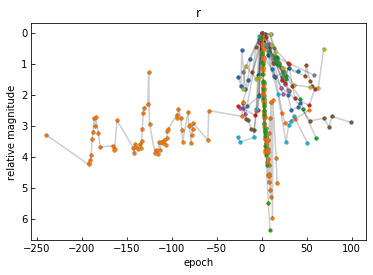

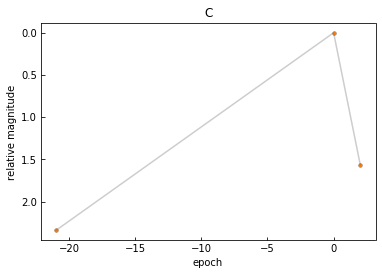

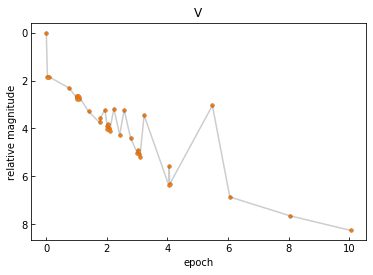

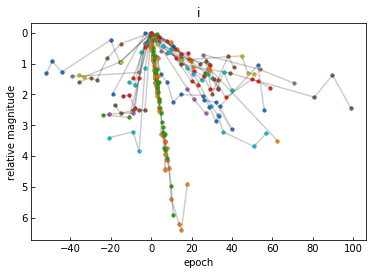

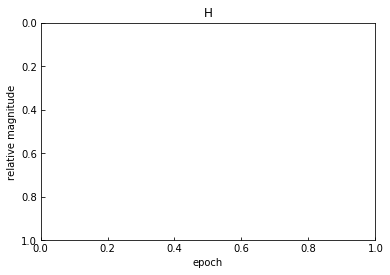

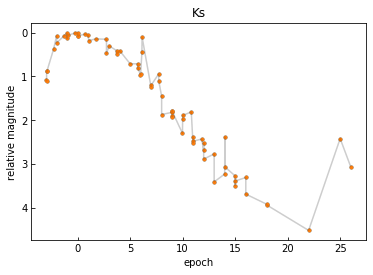

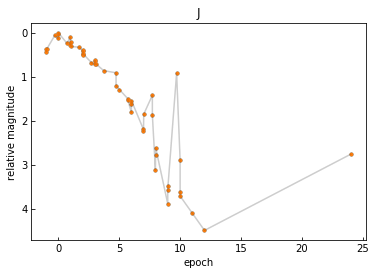

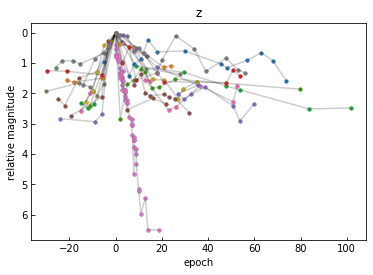

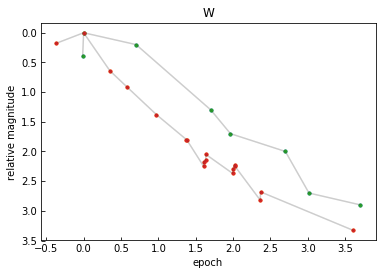

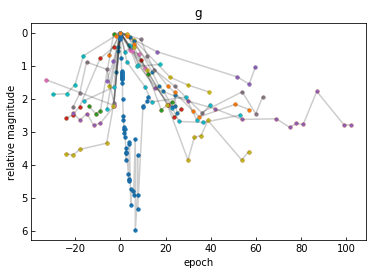

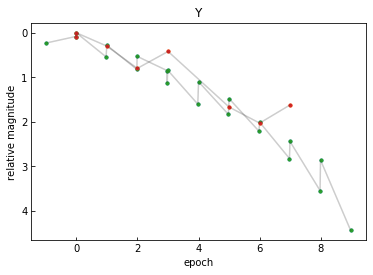

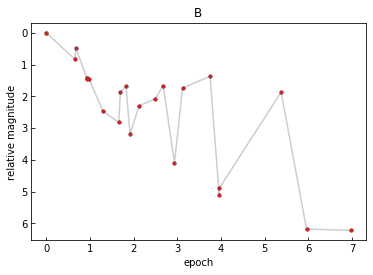

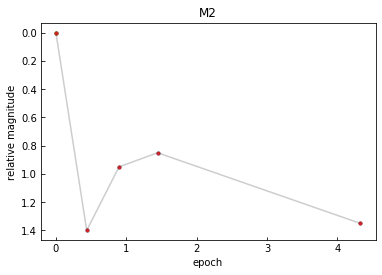

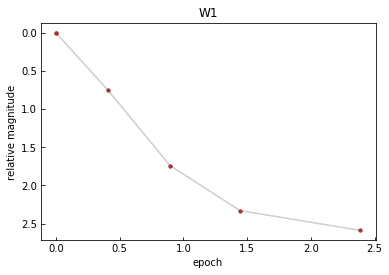

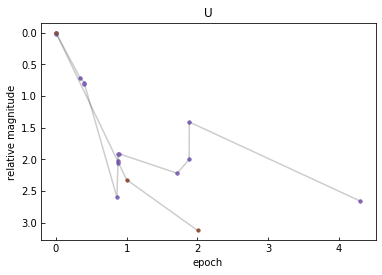

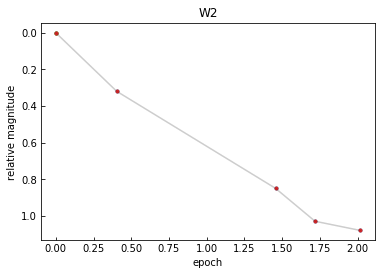

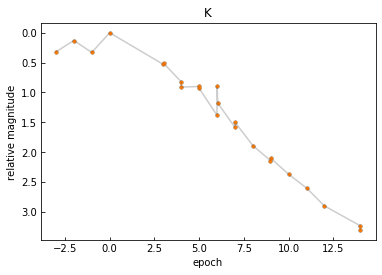

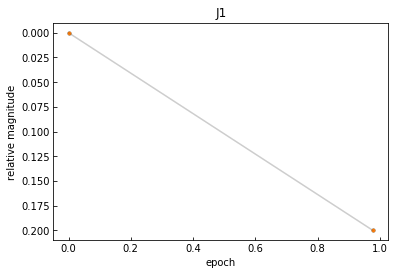

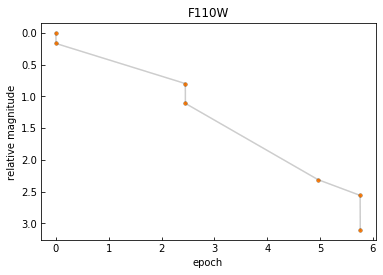

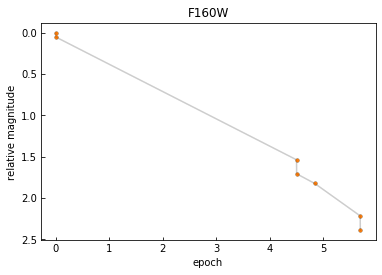

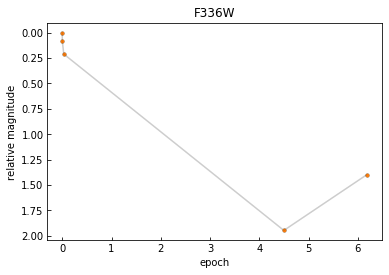

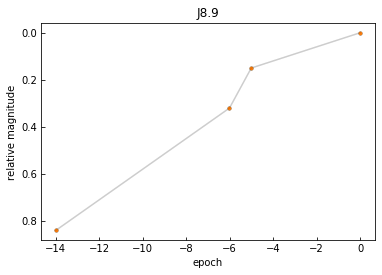

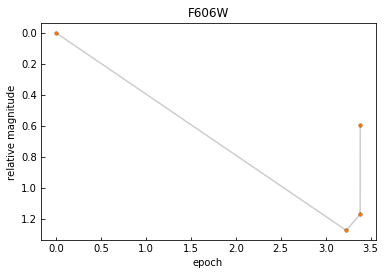

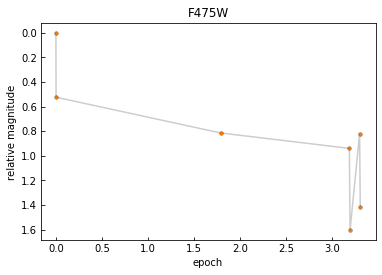

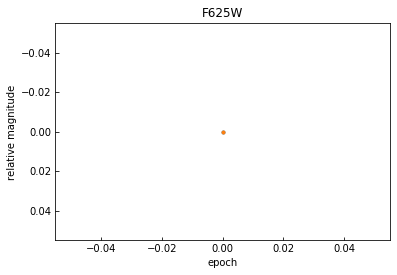

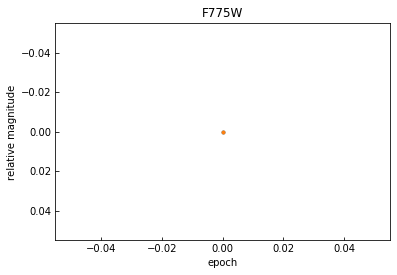

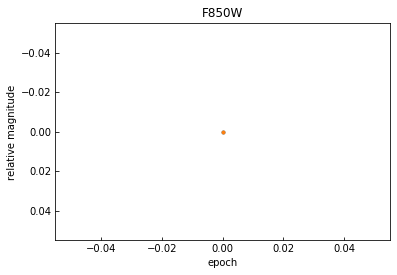

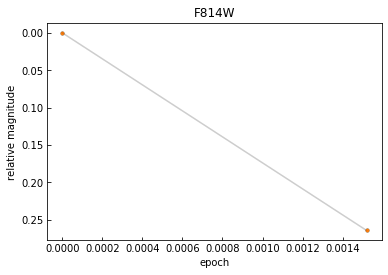

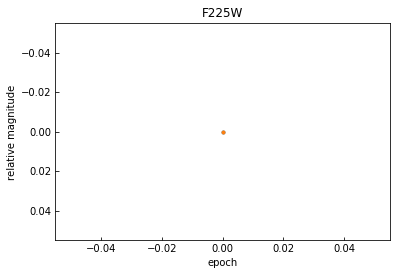

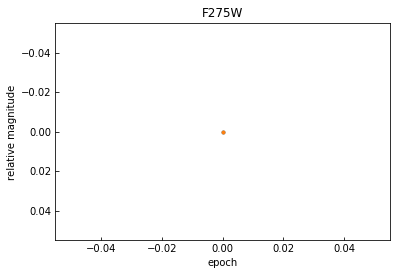

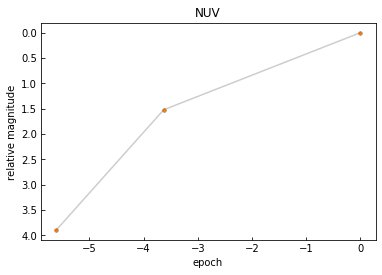

In [116]:
def getmin(lc):
    
    data = pd.read_csv(lc)
    #print(data.columns)
    data = data.replace(-99.9, np.nan)
    
    tmin = data[['band', 'mag']].dropna(subset=["mag"]).\
            groupby("band").min()
    #print([data[(data['mag'] == tmin.loc[t].mag) & 
    #                (data['band'] == t)] for t in tmin.index])
    #indices = [(data['band'] == t) & (data['mag'] == tmin.loc[t].mag) 
    #                    for t in tmin.index]
    #data[(data['band'] == t)] ,
    mins = []
    for t in tmin.index:
        tmp_ = data[(data['mag'] == tmin.loc[t].mag) & 
                    (data['band'] == t)]
        if (tmp_.shape[0]) > 1:
            tmp_ = tmp_.iloc[1]

        mins.append(tmp_)
    mins = pd.concat(mins)
    #data[data.index[indices]]
    mins.index = mins['band']
    #, mins = data.loc[tmin])
    #print(mins.drop(["Unnamed: 0",  "Unnamed: 0.1"], axis=1))
    return mins, data, data.band.unique()

figs = {}

for lc in csvs:
    tmp = getmin(lc)
    #print(tmp[0])
    #continue
    tmp[1]['normmag'] = tmp[1]['mag']
    tmp[1]['trel'] = tmp[1]['jd']
            
    for i,b in enumerate(tmp[2]):
        #print(tmp[1].index, b)
        #if not isinstance(tmp[0].loc[b].mag, float):
        #    print (tmp[0].loc[b]["mag"], tmp[0].loc[b].mag)
        #print(tmp[0].loc[b])
        #print (figs.keys())
        if b.lower() not in figs.keys():
            figs[b.lower()] = pl.figure().add_subplot(111)
            pl.gca().invert_yaxis()
            pl.title(b)
            pl.xlabel("epoch")
            pl.ylabel("relative magnitude")
        
        #print("here", tmp[0].loc[b].mag, b)
        #print(i, len(tmp[0].loc[b]))#['mag']) )
        try:
            tmp[1]['normmag'][tmp[1].band == b] = tmp[1][tmp[1].band == b].mag - tmp[0].loc[b].mag
            tmp[1]['trel'][tmp[1].band == b] -= tmp[0].loc[b].jd
            #print(tmp[1][['mag','normmag']], tmp[0].loc[b].mag)
        except:
            continue
        #print( tmp[0])
        #continue
        #print(tmp[1]['trel'][tmp[1].band == b], tmp[1]['normmag'][tmp[1].band == b])
        figs[b.lower()].plot(tmp[1]['trel'][tmp[1].band == b], tmp[1]['normmag'][tmp[1].band == b], '.')
        figs[b.lower()].plot(tmp[1]['trel'][tmp[1].band == b], tmp[1]['normmag'][tmp[1].band == b], 
                             'k-', alpha=0.1)
            
    tmp[1].to_csv(lc.replace(".csv", "_normed.csv"))
    #print(tmp[1])